### Import Necessary Modules
This imports essential modules from the `pyAGAMO` framework and `matplotlib` for visualization.

In [1]:
# import problem
from pyagamo.objectives import RE36
# import player
from pyagamo.players import ClonalSelection
# import manager
from pyagamo import AGAMO
# for visualization
import matplotlib.pyplot as plt

### Set Main Parameters of the Algorithm
Defines key parameters:

In [2]:
# termination condition, maximum number of objective function evaluations (slowest function)
max_eval = 10000
# size of population
npop = 25
# frequency of changes assigned decision variables (number of iterations)
change_iter = 1
# the maximum number of optimization steps that can be performed during the remaining player's iteration.
next_iter = -1
# maximum number of solutions in results population
max_front = 100

# set parameters for the Clonal Selection algorithm
player_parm = { "nclone": 15, "mutate_args": [0.45, 0.9, 0.01], 'sup': 0.0}

## Create Objectives and Players
Creates a list of objectives and a list of players. Each objective and player is instantiated with specific parameters.

In [3]:
objs = [RE36(i, obj=i+1) for i in range(3)]
players = [ClonalSelection(i, npop, player_parm) for i in range(3)]

### Initialize and Start the AGAMO Manager
Initializes the AGAMO manager with defined parameters, adds objectives and players, and starts the optimization process.

In [4]:
# create agamo manager
agamo = AGAMO(max_eval, change_iter, next_iter, max_front)
# add objectives
agamo.add_objectives(objs)
# add players
agamo.add_players(players)
# initialize algorithm
agamo.init()
# start optimize
agamo.start_optimize()

10070.0eval [00:10, 972.66eval/s]                         


### Get and Visualize Results
Retrieves the results of the optimization process, closes the AGAMO manager, and visualizes the Pareto front of the optimization results using a 3D scatter plot.

In [5]:
res=agamo.get_results()
print(res.keys())
agamo.close()

dict_keys(['stop_flag', 'front', 'front_eval', 'iterations', 'evaluations', 'evaluations_m'])


In [6]:
print(res['iterations'])
print(res['evaluations'])
print(res['evaluations_m'])

[81. 80. 79.]
[6769. 6657. 6624.]
[3424. 3413. 3449.]


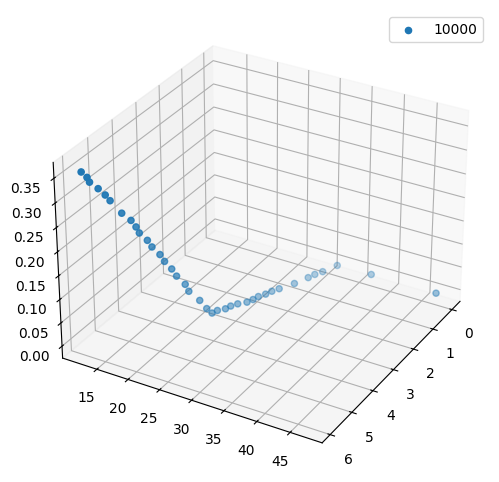

In [7]:
# visualize result pareto front
ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111, projection='3d')
front_eval = res['front_eval']
ax.scatter(front_eval[:, 0], front_eval[:, 1], front_eval[:, 2], marker='o', label=str(max_eval))
ax.grid(True)
ax.view_init(30, 30)
plt.legend()
#plt.savefig('RE36_agamo_result.pdf')
plt.show()